# 파이썬 스타일 코드1 - 연습해보기
# 일반문제

## 1. Css Selector 수정
Css Selector는 웹 페이지에서 특정 요소를 선택하기 위해 해당 요소까지 찾아갈 수 있도록 해주는 주소와 같은 것이다. 대부분의 웹브라우저에서는 해당 요소에 대한 css selector 값을 쉽게 얻어올 수 있다. (F12 > Selector an Element). 다음과 같은 selector가 있다고 한다.
    #today_main_news > div.hdline_news > ul > li:nth-child(1)
이러한 selector를 웹크롤링에서 사용하기 위해서는 :nth-child라는 부분을 제거하는 적업이 필요한데, 이를 자동화 해보자.
    # Q: 해당 Seletor를 문자열로 표시하고, split과 join 함수를 활용하여 다음 예시와 같은 selector를 출력하시오.

In [4]:
selector = "#today_main_news > div.hdline_news > ul > li:nth-child(1)"

selector_list = selector.split(">") #">"구분자를 통해 구분하기
selector_list[-1] = selector_list[-1].split(":")[0] #":"를 없애기 위해 구분자":"를 통해 구분
" > ".join(selector_list)

'#today_main_news  >  div.hdline_news  >  ul  >  li'

## 2. list comprehension으로 만드는 구구단
PR5 문제 3번에서 만들었던 구구단 계산기를 list comprehension으로 구현해보고자 한다.
    # Q. list comprehension을 사용하여 구구단을 연산하는 함수 gugu_com을 작성하고 구구단 7단을 출력하시오.

In [8]:
def gugu_com(x):
    [print(f"{x} x {i} = {x*i}") for i in range(1,10)] #f"{x} x {i} = {x*i}" 이것과 같이 틀을 만들어줌.

gugu_com(7)

7 x 1 = 7
7 x 2 = 14
7 x 3 = 21
7 x 4 = 28
7 x 5 = 35
7 x 6 = 42
7 x 7 = 49
7 x 8 = 56
7 x 9 = 63


## 3. 두 주사위의 곱
두 주사위의 곱은 다음과 같은 결과를 가진다.
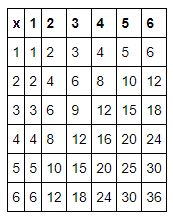
    # Q.list comprehension을 사용하여, 힌트를 제외하고는 한줄의 코드로 해당 결과를 가지는 이차원 리스트를 만드시오.

In [9]:
die = [i for i in range(1,7)]
[[j*i for i in die] for j in die] #이차원 리스트를 이용하여 연속적으로 곱해지도록 함.

[[1, 2, 3, 4, 5, 6],
 [2, 4, 6, 8, 10, 12],
 [3, 6, 9, 12, 15, 18],
 [4, 8, 12, 16, 20, 24],
 [5, 10, 15, 20, 25, 30],
 [6, 12, 18, 24, 30, 36]]

## 4. 두 주사위의 합
간단한 테이블 형태의 데이터를 2차원 리스트로 표현해보자. 2개의 주사위를 굴리면 다음 표와 같이 36가지의 결과가 나온다.
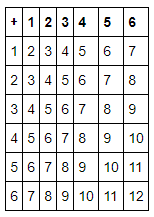
    #Q. 이것을 6X6 크기의 2차원 리스트로 생성하고, 인덱싱을 통해 2+6의 값을 2가지 방법으로 나타내시오.(2차원 리스트 생성시 방법의 제한은 없습니다.)

In [10]:
die = [i for i in range(1,7)]
die_sum = [[j+i for i in die]for j in die]

print(die_sum[1][5])
print(die_sum[5][1])

8
8


## 도전문제

## 표절 검사 프로그램
강의노트 07 자료구조 collections 설명 참고
아주대학교 글로벌 경영학과의 한 교수님은 과제의 표절 검사를 쉽게 하기 위해 python을 통한 간단한 표절 검사 프로그램을 작성해보고자 한다.
현재 구상 중인 프로그램은 복잡한 알고지름을 필요로 하지 않고, 간단하게 단어 빈도를 기반으로 하여, 그 유사도를 측정하고자 한다.

In [11]:
from collections import defaultdict, Counter

text = """Python is a very simple programming language so even if you are new to programming, you can learn python without facing any issues."""

text2 = """C is a very difficult programming language so even if you are good at programming, you can learn c with facing any issues."""

text3 = """R Programming is good at statistical analysis. you can learn easily"""

### 문제1
    # Q:defaultdict를 활용하여 text를 입력받으면 단어별 빈도를 측정하여 반환하는 함수 word_counter를 만드시오.

In [17]:
def word_counter(text):
    word_count = defaultdict(lambda:0)
    for word in text.lower().split(): #유사도 측정을 위해 split로 단어별로 분할 후, 소문자로 바꿔줌.
        word_count[word] += 1
    return word_count

word_counter(text)

defaultdict(<function __main__.word_counter.<locals>.<lambda>()>,
            {'python': 2,
             'is': 1,
             'a': 1,
             'very': 1,
             'simple': 1,
             'programming': 1,
             'language': 1,
             'so': 1,
             'even': 1,
             'if': 1,
             'you': 2,
             'are': 1,
             'new': 1,
             'to': 1,
             'programming,': 1,
             'can': 1,
             'learn': 1,
             'without': 1,
             'facing': 1,
             'any': 1,
             'issues.': 1})

### 문제2
    # Q: 도전문제 1의 word_counter 활용하여 text와 text2의 유사도와 text와 text3의 유사도를 구하시오.

In [14]:
def text_similarity(text_count_1, text_count_2):
    text1_count = Counter(text_count_1)
    text2_count = Counter(text_count_2)
    
    word_total = sum(text1_count.values()) #전체 단어수 합
    word_diff = sum((text1_count - text2_count).values())
    
    return (1 - word_diff / word_total) * 100

text_similarity(word_counter(text),word_counter(text2))

73.91304347826086

In [16]:
text_similarity(word_counter(text),word_counter(text3))

21.739130434782606